In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import importlib

import agent
importlib.reload(agent)


c:\Users\yshang\OneDrive - Tessella Ltd\Documents\Training\RL\deepQ-course\dq-env\lib\site-packages\gym\core.py:27: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


<module 'agent' from 'c:\\Users\\yshang\\OneDrive - Tessella Ltd\\Documents\\Training\\RL\\deepQ-course\\fundamentals\\agent.py'>

random action agent:

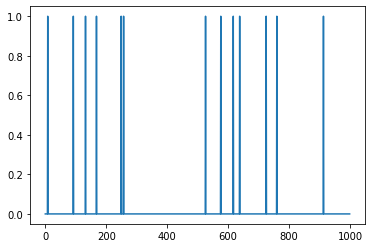

In [28]:
env = gym.make("FrozenLake-v1")

n_games = 100
scores = []
steps = []

for i in range(n_games):
    terminated = False 
    obs, info = env.reset()
    score = 0
    n_step = 0

    while not terminated: 
        obs, reward, terminated, truncated, info = env.step(env.action_space.sample())
        score = score + reward
        n_step = n_step+1

    steps.append(n_step)
    scores.append(score)

env.close()
plt.plot(scores)

Q-learning agent

In [53]:
import agent
importlib.reload(agent)
from agent import Agent

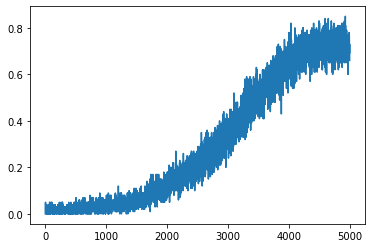

In [60]:
# initialise the environment to get the action space and the observation space
env = gym.make("FrozenLake-v1")
n_actions = env.action_space.n
n_states = env.observation_space.n

# initialise the agent with these values 
q_agent = Agent(n_states, n_actions, d_eps=0.9999995)

# let the agent play the game 
n_games = 500000
scores = []
win_pct = []
epsilon = []

for i in range(n_games):
    terminated = False 
    state, info = env.reset()
    score = 0
    action = 0

    while not terminated: 
        action_taken = q_agent.choose_action(state)
        
        new_state, reward, terminated, truncated, info = env.step(action_taken)
        # update Q
        q_agent.update_Q(state, new_state, action_taken, reward)
        # update the state
        state = new_state
        score += reward

    scores.append(score)

    if i % 100 == 0:
        win = np.mean(scores[-100:])
        win_pct.append(win)
        epsilon.append(q_agent.epsilon)

plt.plot(win_pct)



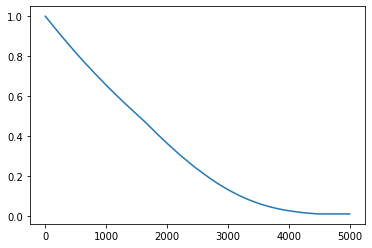

In [61]:
plt.plot(epsilon)
